In [7]:
#Importing all neccessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics
%matplotlib inline
sns.set(color_codes=True)
diab=pd.read_csv(r"C:\Users\welcome\Downloads\pima-indians-diabetes+(3).csv")

In [8]:
diab.head(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Describing the Variables
diab.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
#Information of all the variables, their datatypes and count
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
#Lets analysze the distribution of the various attributes
diab.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [17]:
#Trying to print count of the variables with 0 as a value
print((diab[['Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']] == 0).sum())

Plas      5
Pres     35
skin    227
test    374
mass     11
pedi      0
age       0
dtype: int64


In [18]:
# Make a copy of original dataset, where diab_nn is dataset for removing null values
diab_nn = diab.copy(deep=True)

In [19]:
#Replacing all the outlier 0s with Nan
diab_nn[['Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']] = diab_nn[['Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']].replace(0, np.NaN)

In [23]:
# Replacing all Nan with the mean of the variable in the corresponding Column.
diab_nn.fillna(diab.median(), inplace=True)

In [24]:
# ENsuring if all missed values are properly replaced
diab_nn.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [26]:
#Lets analysze the distribution of the various attributes
diab_nn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Plas,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
Pres,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
skin,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
test,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
mass,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


In [27]:
diab_nn.groupby(["class"]).count()

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


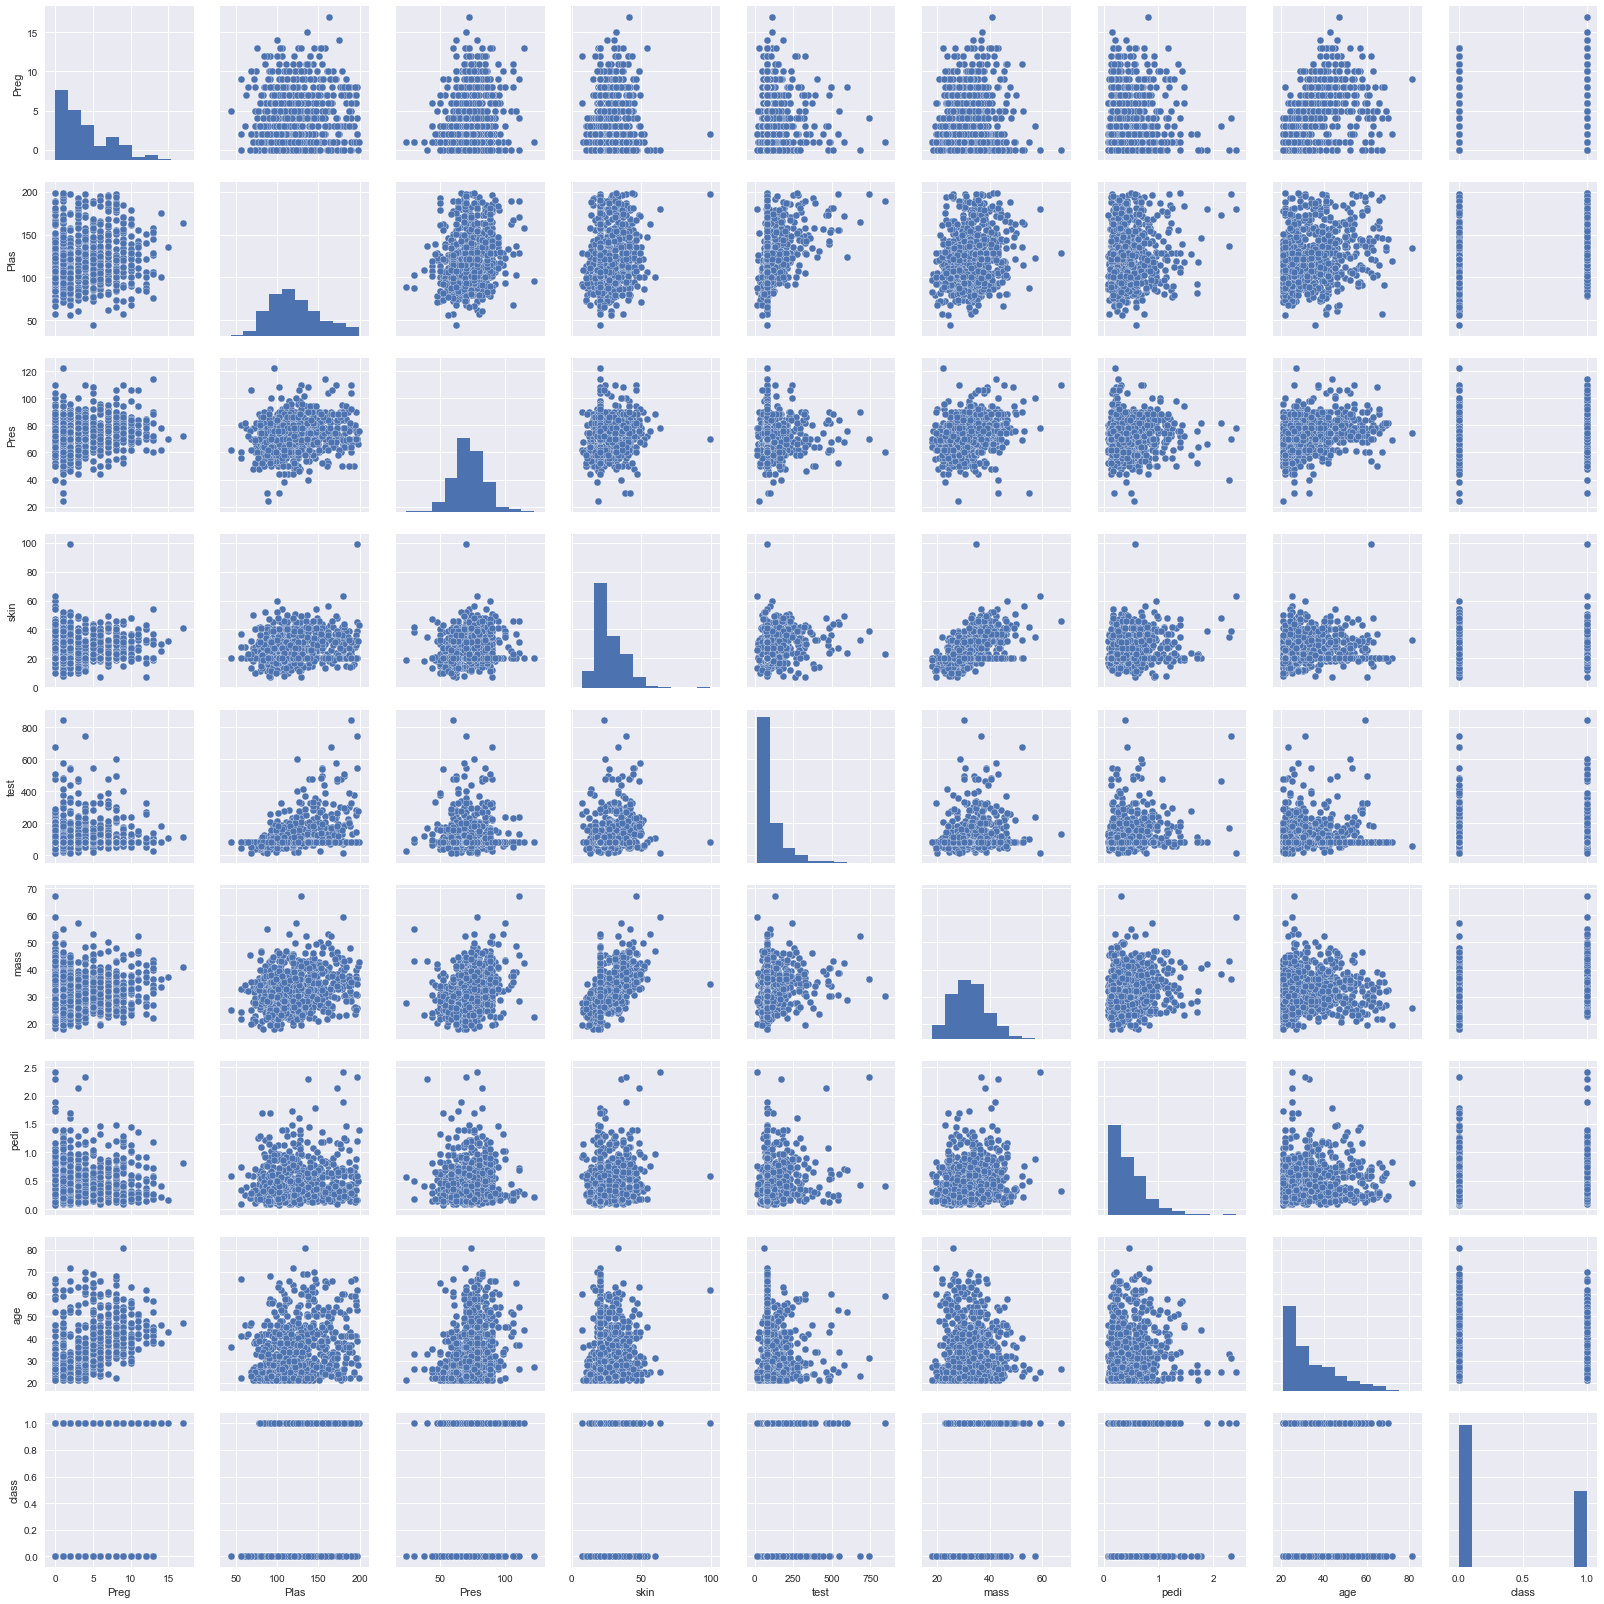

In [28]:
sns.pairplot(diab_nn)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009951745BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000009951936F98>]], dtype=object)

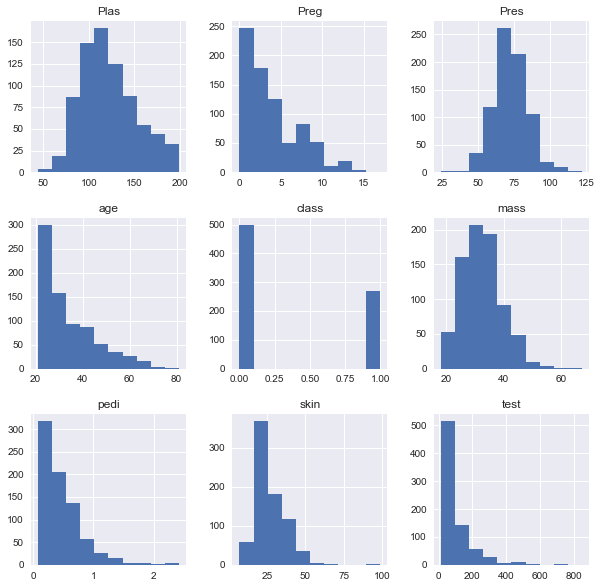

In [31]:
# Histogram for all individual varaibles
diab_nn.hist(figsize=(10,10))

In [32]:
array = diab_nn.values
X = diab_nn.iloc[:,0:8]
y = diab_nn.iloc[:,8]
#X = array[:,0:8] # select all rows and first 8 columns which are the attributes
#Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [34]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)



coef_df = pd.DataFrame(model.coef_, columns= ['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age'])
coef_df['intercept'] = model.intercept_
print(coef_df)

       Preg      Plas      Pres      skin     test      mass      pedi  \
0  0.093529  0.026643 -0.029455 -0.014809 -0.00037  0.078596  0.387904   

        age  intercept  
0  0.012507  -4.913344  


In [35]:

model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))


0.774891774892
[[131  15]
 [ 37  48]]


In [36]:
# Iteration 2

In [43]:

from sklearn import preprocessing
pima_df_scaled = preprocessing.scale(diab_nn[0:7])
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [44]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)


0.774891774892


In [45]:
print(metrics.confusion_matrix(y_test, y_predict))

[[131  15]
 [ 37  48]]


In [51]:
# Gaussian Naive bayes
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()

In [52]:
model_NB.fit(X_train_scaled, y_train)
y_predict = model_NB.predict(X_test_scaled)
model_score = model_NB.score(X_test_scaled, y_test)
print(model_score)

0.779220779221


In [53]:
#Confusion Matrix
print(metrics.confusion_matrix(y_test, y_predict))

[[128  18]
 [ 33  52]]


The model build using Gaussian Naive bayes is giving model score of 0.779 which is better than Logistic Regression Model. We can also see a minor improvement in the confusion matrix.
